# The Calculus of Differential Forms
Regard calculus of forms as a seperate language? 

No! But a special set of notations for a limited part of GC.

So GC is more general, but what's good? Some limits of differential forms.

1-form: dual to a vector field

2-form: dual to a bivector field

Exterior derivative: k-form -> k+1-form

pullback, pushforward

### Teminalogy
differential form: scalar valued multiform

multiform: multivector valued alternating form

alternating form: skew-symmetric and linear in each argument

s, r-form: a multiform of degree r and grade s; F(X) = F(X.grade(r)).grade(s)

### Examples:
1. a linear transformation is a 1, 1-form
2. an outermorphism of a differential is a r, r-form
3. a differential r-form is a 0, r-form
4. Riemann curvature is a 2, 2-form

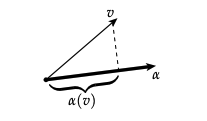

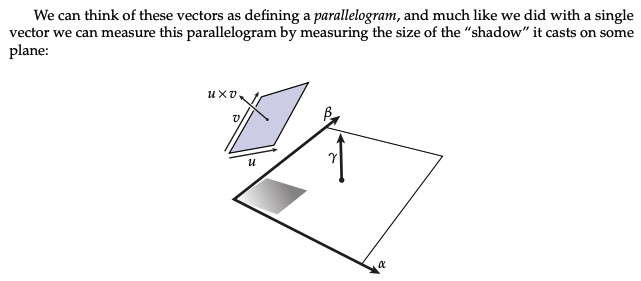

In [3]:
from gc_utils import *
alg = Algebra(1, 3)
locals().update(alg.blades)

In [4]:
# Canonical form for a differential forms:
# Alternating means wedging
r = 2
A, B = [random_multivector(alg) for _ in range(2)]
alpha = lambda vectors: (A*wedge(vectors)*B).grade(0) # an arbitrary scalar-valued alternating form
vectors = random_r_vectors(r, alg)
Ar = simplicial_derivative(alpha, np.zeros(r), alg)
Ar, Ar | wedge(vectors), alpha(vectors)

(-0.914 𝐞₁₂ + -0.274 𝐞₁₃ + 2.81 𝐞₁₄ + 0.143 𝐞₂₃ + 0.802 𝐞₂₄ + 1.45 𝐞₃₄,
 -0.554,
 -0.554)

So this is what meant by: 

1-form: dual to a vector field

2-form: dual to a bivector field

In 3d, we can use this casting shadow visualization. What about a screw in 4d? Do a bivector split in an orthogonal manner. Then we can cast shadow just like 3d.

If Ar is simple, then the differential form is a determinant.

On the other hand, we can split Ar into blades.

So the differential form is a sum of determinants

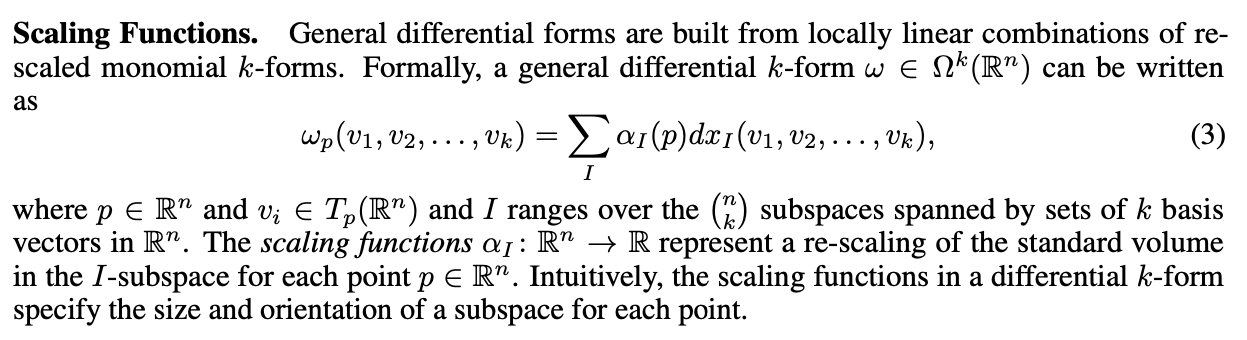

In [ ]:
# Admitting the 6-dim bivector bases may be enough here
# Yet the bivector split gets us the simplest decomposition?
blades = bivector_split(Ar, alg)
blades, [blade_split(B, alg) for B in blades]

([0.154 𝐞₁₂ + -0.0955 𝐞₁₃ + -0.319 𝐞₂₃ + 0.0536 𝐞₁₄ + -0.0207 𝐞₂₄ + 0.124 𝐞₃₄,
  -1.07 𝐞₁₂ + -0.178 𝐞₁₃ + 0.462 𝐞₂₃ + 2.75 𝐞₁₄ + 0.823 𝐞₂₄ + 1.33 𝐞₃₄],
 [[-0.092 𝐞₁ + -0.246 𝐞₂ + -0.038 𝐞₃ + -0.0981 𝐞₄,
   0.68 𝐞₁ + 0.148 𝐞₂ + 1.32 𝐞₃ + 0.143 𝐞₄],
  [0.405 𝐞₁ + 0.846 𝐞₂ + 0.316 𝐞₃ + -1.87 𝐞₄,
   1.43 𝐞₁ + 0.358 𝐞₂ + 0.68 𝐞₃ + 0.183 𝐞₄]])

In [4]:
# The determinant of a linear transformation between spaces I and I'
# The relative orientation between I and I' can be arbitrary.
# Let the parent algebra determines the orientation.
def det(f, I, Ip):
    return (outermorphism(f, I, alg)/Ip)[0]

### Algebra of forms

In [6]:
# summation
C, D = [random_multivector(alg) for _ in range(2)]
beta = lambda vectors: (C*wedge(vectors)*D).grade(0)
Br = simplicial_derivative(beta, np.zeros(r), alg)
beta(vectors) + alpha(vectors), (Ar + Br) | wedge(vectors)

(-1.77, -1.77)

In [7]:
# exterior product
r, s = 1, 3
svectors = random_r_vectors(s, alg)
rvectors = random_r_vectors(r, alg)
Ar = simplicial_derivative(alpha, np.zeros(r), alg)
Bs = simplicial_derivative(beta, np.zeros(s), alg)
(Bs ^ Ar) | wedge(rvectors + svectors), (-1)**(r*s)*(Ar ^ Bs) | wedge(rvectors + svectors)

(0.024, 0.024)

In [8]:
# interior product (r > s)
r, s = 3, 1
vectors = random_r_vectors(r - s, alg)
Ar = simplicial_derivative(alpha, np.zeros(r), alg)
Bs = simplicial_derivative(beta, np.zeros(s), alg)
(Ar | Bs) | wedge(vectors)

-2.08

### Calculus on a Manifold
On a point x of a manifold, Ix(x) is the pseudoscalar of the tangent space. A vector field assigns each point a vector within Ix(x).

In [9]:
# Let this ellipsoid and time be our manifold.

alg = Algebra(3,1)
locals().update(alg.blades)

c2e = lambda p, t: 4*np.cos(p)*np.sin(t)*e1 + 5*np.sin(p)*np.sin(t)*e2 + np.cos(t)*e3
e_p = lambda p, t: -4*np.sin(p)*np.sin(t)*e1 + 5*np.cos(p)*np.sin(t)*e2
e_t = lambda p, t: (4*np.cos(p)*np.cos(t)*e1) + (5*np.sin(p)*np.cos(t)*e2) - (np.sin(t)*e3)
def Ix(x):
    p = np.arctan((4/5)*x.e2/x.e1)
    t = np.arccos(x.e3)
    return e_p(p, t) ^ e_t(p, t) ^ e4

# |p| < pi/2, 0 < t < pi for unique arctan & arccos
p, t = -1, 3
x = c2e(p, t)
I = Ix(x)

I, I ^ (3*e_t(p,t) + 5*e_p(p,t))

(2.79 𝐞₁₂₄ + -0.067 𝐞₁₃₄ + -0.0538 𝐞₂₃₄, -3.69e-15 𝐞₁₂₃₄)

In [10]:
#4.1
# Let alpha be a differential form on the ellipsoid
r, s = 2, 1
C, D, E = [random_multivector(alg) for _ in range(3)]
Ar = lambda x: (E*x**2 + C*x*D).grade(r)
Bs = lambda x: (D*x**2 + E*x*C).grade(s)
dXr = lambda x: P(C.grade(r), Ix(x))
dXs = lambda x: P(D.grade(s), Ix(x))
alpha = lambda dX: lambda x: Ar(x).reverse() | dX
beta = lambda dX: lambda x: Bs(x).reverse() | dX
alpha(dXr(x))(x), beta(dXs(x))(x)

(-1.17, 3.06)

In [15]:
from sympy.combinatorics import Permutation
from math import factorial

def ext_prod(alpha, beta, r, s, vectors):
    coef = 1 / factorial(len(vectors)-1)

    def result(x):
        return coef * sum(
            Permutation([l.index(v) for v in vectors]).signature()  # Correct way to get the permutation sign
            * alpha(wedge(l[:r]))(x) 
            * beta(wedge(l[-s:]))(x)
            for l in permutations(vectors)
        )
    
    return result

r, s = 2,1
vectors = blade_split(dXr(x) ^ dXs(x), alg)
(dXr(x) ^ dXs(x)).reverse() | (Ar(x) ^ Bs(x)), ext_prod(alpha, beta, r, s, vectors)(x)

(5.05, 5.05)

Canonical form for biform (2, 2-form): ../chap3_part3.ipynb

We can classify multiforms by computing their tractions.

symmetric/skew parts, protractionless/contractionless parts

Some facts:

1. protractionless -> symmetric
2. But only for linear transformation, symmetric -> protractionless
3. k-fold contraction of a protractionless multiform is also protractionless

In [ ]:
#9.22 biform decomposition
# biform = T + sum_0^4 F_i, first the 0, 2, 4 are known:
F0 = lambda X: 2/(n*(n-1)) * X * div(biform, X, alg, grade=2)
F2 = lambda X: (0.5/(n-2)) * X.cp(derivative(biform, 0, alg, grade=2, operator=alg.cp))
F4 = lambda X: (1/6) * X | curl(biform, 0, alg, grade=2)
biform(X), F0(X), F2(X), F4(X)

(-5.17 𝐞₁₂ + -2.53 𝐞₁₃ + -2.63 𝐞₁₄ + -5.61 𝐞₂₃ + -6.57 𝐞₂₄ + -1.21 𝐞₃₄,
 0.0846 𝐞₁₂ + 1.19 𝐞₁₃ + 2.01 𝐞₁₄ + 1.05 𝐞₂₃ + 0.165 𝐞₂₄ + 1.08 𝐞₃₄,
 0.59 𝐞₁₂ + 0.532 𝐞₁₃ + -0.635 𝐞₁₄ + -0.436 𝐞₂₃ + -0.755 𝐞₂₄ + 1.09 𝐞₃₄,
 -0.236 𝐞₁₂ + 0.0362 𝐞₁₃ + -0.23 𝐞₁₄ + -0.44 𝐞₂₃ + 0.261 𝐞₂₄ + -0.0185 𝐞₃₄)

In [ ]:
#9.23
[derivative(biform, 0, alg, grade=2) for biform in (biform, F0, F2, F4)]

[13.2 + -6.47 𝐞₁₂ + 5.57 𝐞₁₃ + -2.98 𝐞₁₄ + -6.45 𝐞₂₃ + 3.9 𝐞₂₄ + -0.832 𝐞₃₄ + 2.89 𝐞₁₂₃₄,
 13.2,
 -6.47 𝐞₁₂ + 5.57 𝐞₁₃ + -2.98 𝐞₁₄ + -6.45 𝐞₂₃ + 3.9 𝐞₂₄ + -0.832 𝐞₃₄,
 2.89 𝐞₁₂₃₄]

In [ ]:
# Note f1, f3 take grade 1 inputs
frame = alg.frame
rframe = reciprocal(frame)
F1 = lambda X: (1/(n-2))*sum((X | r) * differential(f1, 0, v) for v, r in zip(frame, rframe))
F3 = lambda X: 0.5*sum((X | r) | differential(f3, 0, v) for v, r in zip(frame, rframe))
T = lambda X: biform(X) - F0(X) - F1(X) - F2(X) - F3(X) - F4(X)
traction(T, x)

-4.33e-15 𝐞₁ + 6.66e-16 𝐞₂ + -2.66e-15 𝐞₃ + 2.12e-16 𝐞₄ + 4.44e-16 𝐞₁₂₄ + 1.78e-15 𝐞₁₃₄ + -1.78e-15 𝐞₂₃₄

In [ ]:
# tractions: r-form -> (r-1)-form
# exterior derivative: r-form -> (r+1)-form
# tensor divergence: r-form -> (r-1)-form

def traction(F, Y):
    return derivative(lambda x: F(x ^ Y), 0, alg, grade=1)

def d(T, x, B, alg, Ix, h=1e-6):
    return sum(
    o(lambda x: T(x, inner(B, r))) for r, o in derivative_gen(x, alg, h, Ix=Ix)
    )

def tensor_div(T, x, B, Ix, h=1e-6):
    frame = blade_split(Ix(x), alg)
    r_frame = reciprocal(frame)
    return sum(differential(lambda x: T(x, alg.op(B,r)), x, v, h=h) for v, r in zip(frame, r_frame))